In [2]:
from Scripts import ScriptOptions 
import os

params= ScriptOptions(
    ImageFolder= r"./TestPic/",
    model='big', #Ещё есть convnext, swinv2, big, vit
    gen_threshold=0.35, #увереность для общей картинки/и если не установлено значение в конфиге yolo моделей то для них тоже
    char_threshold=0.75, # Увереность для персонажей, теги персонажей берутся только из полной области, по причине я так захотел
    batch=2,
    recursive=False,
    save_txt=False,
    append_txt=False
)



In [3]:
from Scripts import BatchTagging
result=BatchTagging(params)

Не удалось загрузить pytorch_model.bin: 404 Client Error. (Request ID: Root=1-67c9d6dc-0b9dac1b6e9f4b462c90b759;4cacdf67-0af0-4fae-945f-319370be431a)

Entry Not Found for url: https://huggingface.co/SmilingWolf/wd-eva02-large-tagger-v3/resolve/main/pytorch_model.bin.
Файл config.json уже существует в models\taggers\wd-eva02-large-tagger-v3
Файл model.safetensors уже существует в models\taggers\wd-eva02-large-tagger-v3
Файл selected_tags.csv уже существует в models\taggers\wd-eva02-large-tagger-v3
Загрузка модели тегирования 'big' из 'SmilingWolf/wd-eva02-large-tagger-v3'...
Loading model from models\taggers\wd-eva02-large-tagger-v3\model.safetensors using safetensors
Загрузка списка тегов...
Загрузка тегов из локального файла: models\taggers\wd-eva02-large-tagger-v3\selected_tags.csv
Создание трансформации данных...
Загрузка конфигурации детекторов из detectors.json...
Загрузка модели YOLO person_yolov8s-seg.pt...
Loading YOLO model from local directory: models\yolo\person_yolov8s-seg.

In [4]:
# result[0][x] - теги по областям, для общей области, путь до изображения, какие детекторы и box для них Для Изображения X
# result[1][x] - обьедененые теги + путь до изображения X
print(result[1][0].keys())
print()
print(result[0][0].keys())
print()
print(result[1][0]['merged_tags'].keys())

dict_keys(['image_path', 'merged_tags'])

dict_keys(['image_path', 'full_image', 'detectors'])

dict_keys(['caption', 'taglist', 'general', 'character', 'ratings'])


In [5]:
print(result[1][3]['merged_tags']['caption'])
print()
print(result[1][3]['merged_tags']['taglist'])

bare_tree, black_sky, branch, cloud, cloudy_sky, dark, full_moon, glowing, moon, moonlight, night, night_sky, no_humans, outdoors, rope, scenery, shide, shimenawa, sky, tree

bare tree, black sky, branch, cloud, cloudy sky, dark, full moon, glowing, moon, moonlight, night, night sky, no humans, outdoors, rope, scenery, shide, shimenawa, sky, tree


In [6]:
print(result[0][1]['full_image']['taglist'])
print()
print(result[1][1]['merged_tags']['taglist'])

letterboxed, sky, fence, no humans, dog, scenery, outdoors, rooftop, house, shooting star, cat, wooden fence, night, grey sky, animal, solo, building, on roof, night sky, cloud, contrail, wide shot, dark

animal, building, cat, cloud, contrail, dark, dog, fence, grey sky, house, letterboxed, night, night sky, no humans, on roof, outdoors, rooftop, scenery, shooting star, sky, solo, wide shot, wooden fence


In [25]:
bab=4

In [27]:
print(result[0][bab]["full_image"]['taglist'])


1girl, 1boy, bicycle, outdoors, long hair, shirt, skirt, ahoge, pink shirt, naoetsu high school uniform, pants, lamppost, day, shoes, sky, standing, wide shot, black hair, white shirt, collared shirt, cloud, short hair, black pants, scenery, bicycle basket, school uniform, pleated skirt, walking, road, looking at another, brown footwear, arms at sides, stool, pantyhose, hand in pocket, short sleeves, from side, dress shirt, blue sky, araragi koyomi


In [29]:
print(result[1][bab]["merged_tags"]['taglist'])


1boy, 1girl, ahoge, araragi koyomi, arms at sides, bicycle, bicycle basket, black eyes, black hair, black pants, black thighhighs, blue sky, breasts, brown eyes, brown footwear, brown hair, cloud, collared shirt, day, dress shirt, film grain, from side, grey skirt, hand in pocket, lamppost, long hair, looking at another, naoetsu high school uniform, necktie, open mouth, outdoors, pants, pantyhose, pink shirt, pleated skirt, pocket, profile, road, sailor collar, scenery, school uniform, senjougahara hitagi, serafuku, shadow, shirt, shoes, short hair, short sleeves, skirt, sky, sleeves rolled up, small breasts, standing, stool, thighhighs, very long hair, walking, white shirt, wide shot, zettai ryouiki


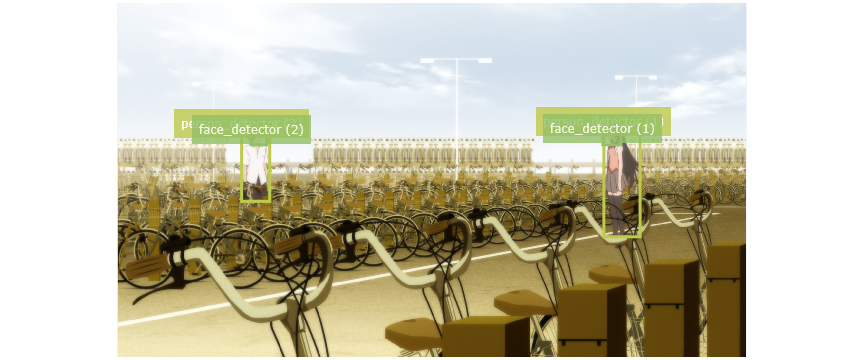

Информация о изображении #5: C:\Users\liali\YoloWdTagger\wdv3-timm\TestPic\blbWBQR.png

Объединенные теги:
1boy, 1girl, ahoge, araragi koyomi, arms at sides, bicycle, bicycle basket, black eyes, black hair, black pants, black thighhighs, blue sky, breasts, brown eyes, brown footwear, brown hair, cloud, collared shirt, day, dress shirt, film grain, from side, grey skirt, hand in pocket, lamppost, long hair, looking at another, naoetsu high school uniform, necktie, open mouth, outdoors, pants, pantyhose, pink shirt, pleated skirt, pocket, profile, road, sailor collar, scenery, school uniform, senjougahara hitagi, serafuku, shadow, shirt, shoes, short hair, short sleeves, skirt, sky, sleeves rolled up, small breasts, standing, stool, thighhighs, very long hair, walking, white shirt, wide shot, zettai ryouiki

Теги без включения yolo моделей:
1girl, 1boy, bicycle, outdoors, long hair, shirt, skirt, ahoge, pink shirt, naoetsu high school uniform, pants, lamppost, day, shoes, sky, standing, 

In [31]:
from Scripts import view_image_results
view_image_results(result, bab, visualize=True, save_visualization=False, verbose=True)

Error analysis saved to full_image_errors.csv
Error analysis saved to merged_tags_errors.csv
Tag performance analysis saved to full_image_tag_performance.csv
Tag performance analysis saved to merged_tags_tag_performance.csv


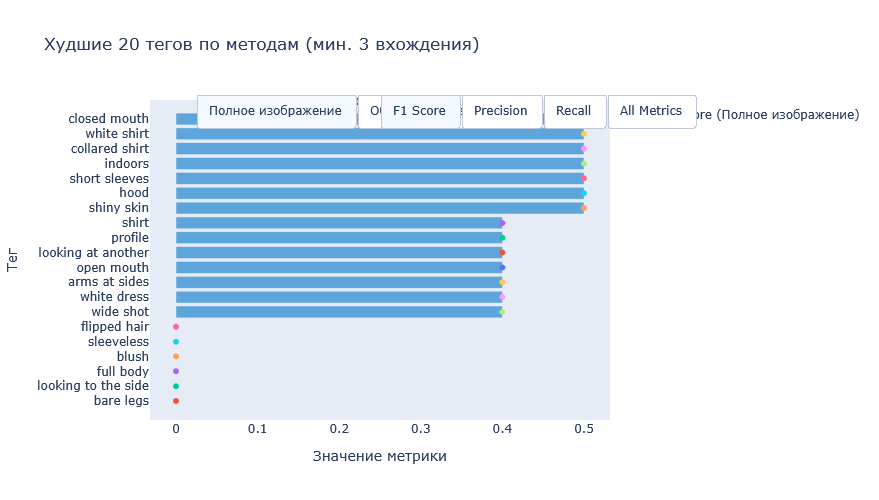

In [11]:
from Scripts import compare_tagging_methods
data=compare_tagging_methods(
    image_folder="./TestPic",
    txt_folder="./TestPic",
    results=result,
    model_labels_path="./models/taggers/wd-eva02-large-tagger-v3/selected_tags.csv",
    filter_tags=True,
    num_worst_examples=5,
    visualize=True,
    interactive=True
)

In [12]:
data[1]

{'Полное изображение':       image                                  ground_truth_tags  \
 9     test1  :o, arm at side, arm support, back, bare legs,...   
 11  GdjyZ8t  1boy, 1girl, araragi koyomi, arms at sides, ba...   
 1     test4  1boy, 1girl, ahoge, araragi koyomi, back, blac...   
 5   BuyFfGW  1boy, 1girl, ahoge, araragi koyomi, arms at si...   
 0   0SxBXLP  1girl, barefoot, blonde hair, bloom, crack, da...   
 4   aPnYnbG  blue sky, building, cloud, day, no humans, out...   
 2   amlEGsC  animal, building, cat, dark, from below, house...   
 6     test3  6+girls, :<, :d, androgynous, black eyes, blac...   
 8   frvxt83  1girl, arms at sides, bare arms, bare legs, ba...   
 10    test2  1girl, bandaid, bandaid on knee, bandaid on le...   
 7   blbWBQR  1boy, 1girl, ahoge, araragi koyomi, arms at si...   
 3   AVP4TTU  bare tree, black sky, cloud, cloudy sky, dark,...   
 
                                        predicted_tags  \
 9   1girl, age progression, barefoot, black dr